# Assignment 6: Implement SGD for Linear Regression

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
boston_dataset = load_boston()

In [5]:
#Creating Dataframe 
df = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adding price column to the above Dataframe 
df['Price'] = Y

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
print("The shape of the DataFrame is ", df.shape)

The shape of the DataFrame is  (506, 14)


### Checking for Null values 

In [8]:
#Checking if we have any Null values in the above DataFrame 
print(df.isnull().values.any())

False


### Seperating Input & Target variable

In [9]:
# Assigning variable 
x = df.drop('Price', axis = 1)
y = df['Price']

In [10]:
y.shape

(506,)

### Split into Train & Test Data

In [11]:
from sklearn.model_selection import train_test_split

#Split into train and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

### Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting & Transforming train data 
x_train_std = scaler.fit_transform(x_train)

# Transform the test data 
x_test_std = scaler.transform(x_test)

In [13]:
print("shape of x_train is ", x_train.shape)
print("shape of x_test is ", x_test.shape)
print("shape of y_train is ", y_train.shape)
print("shape of y_test is ", y_test.shape)

shape of x_train is  (339, 13)
shape of x_test is  (167, 13)
shape of y_train is  (339,)
shape of y_test is  (167,)


In [14]:
# Converting standarised x-train, x-test & ytrain, ytest to numpy array

xtr = np.array(x_train_std)
xte = np.array(x_test_std)

ytr = np.array(y_train)
yte = np.array(y_test)

In [15]:
# Creating a new dataframe to use later for batches of SGD

mini_df = pd.DataFrame(xtr)
mini_df['Price'] = ytr

#Checking this smaller Dataframe 
mini_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,-0.325148,-0.518441,1.597956,-0.294174,0.557472,-0.227690,1.037481,-0.999884,-0.620132,0.200160,1.257070,0.426969,0.827546,17.8
1,0.786268,-0.518441,1.050609,-0.294174,1.015555,0.627038,0.784870,-0.929999,1.718297,1.581000,0.815788,-3.929862,1.835060,7.5
2,-0.376766,-0.518441,-0.978472,-0.294174,-0.392011,0.307362,-1.268042,-0.321616,-0.503211,-0.650052,-0.772831,0.358017,-0.977181,29.4
3,-0.248754,-0.518441,-0.387800,-0.294174,-0.158805,-1.014691,1.044597,-0.013160,-0.620132,-0.583724,1.168814,0.190978,1.179420,13.6
4,-0.119691,-0.518441,1.264349,-0.294174,2.614684,-1.418350,0.898723,-0.968510,-0.503211,-0.004856,-1.611268,-3.151430,0.508661,13.1


## Define a Function to Custom SGD Implementation

In [16]:
#https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
#https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression
#https://stackoverflow.com/questions/50328545/stochastic-gradient-descent-for-linear-regression-on-partial-derivatives

# Defining a function to create own SGD 
#Considering learning rate as 0.01
def custom_sgd(data, l_rate = 0.01 , itr=1000, k=100):
    
    #Initial weight
    ini_w = np.zeros(shape=(1,13))
    #Initial Fit intercept
    ini_b = 0
    itr = 1000
    
    while itr >=0:
        
        #Assigning Initial weights & Initial Intercept
        w_curr =  ini_w  
        b_curr =  ini_b
        
        samp = data.sample(n = 100, random_state = 1)
        y = np.array(samp['Price'])
        x = np.array(samp.drop('Price', axis = 1))
 
        w_temp = np.zeros(shape=(1,13))
        b_temp = 0
        
        #k is the batch size
        for i in range(k): 
            #Partial differentation wrt x 
            w_temp += (-2) * (x[i] * (y[i]-(np.dot(w_curr,x[i])+b_curr)))
            #Partial differentation wrt b
            b_temp += (-2) * (y[i] - (np.dot(w_curr,x[i])+b_curr))
        
        ini_w = (w_curr - l_rate*(w_temp)/k)
        ini_b = (b_curr - l_rate*(b_temp)/k)
        
        itr -= 1

        
    return ini_w, ini_b

### Defining a Function which will use above calculated weights & intercept to predict for Test Data

In [17]:
from sklearn.metrics import mean_squared_error

def predict(xte, yte, w, b):
    
    # making prediction on Test Data
    y_pred = []
    for _ in range(len(xte)):
        pred_value = np.dot(w, xte[_]) + b
        y_pred.append(np.asscalar(pred_value))
    
    #Plotting actual values against predicted values
    plt.scatter(yte, y_pred)
    plt.grid()
    plt.title("Own SGD - Actual values v/s Predicted values")
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    
    #For returning predicted value
    return y_pred

### Manual SGD Implementation

In [18]:
# Learning rate = constant(0.01), iteration = 1000, 

In [19]:
# Calling manual sgd for calculating initial weight & intercept

csgd_w, csgd_b = custom_sgd(mini_df)

In [20]:
csgd_w

array([[-1.22965407,  0.95403051, -0.14395842,  0.13891203, -2.92942015,
         3.26071494, -1.4131721 , -4.47787033,  2.43608688, -1.86021712,
        -2.97417703,  0.42859938, -2.41957362]])

In [21]:
csgd_b

array([23.341322])

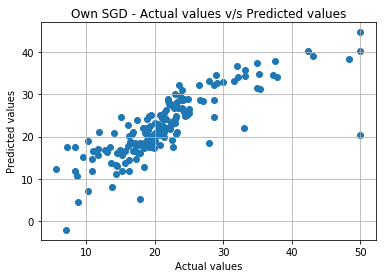

In [22]:
# Using obtained weights (w) and intercept (b), predicting test data

predicted=predict(xte, yte, csgd_w, csgd_b)

In [23]:
Csgd_mse = mean_squared_error(y_test, predicted)
print("The mean squared error is ", Csgd_mse)

The mean squared error is  22.468275512648155


## Sklearn Implementation of SGD 

### Defining Function for sklearn SGD 

In [24]:
# Defining function for sklearn SGD
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

from sklearn.linear_model import SGDRegressor

def skl_sgd(xtr, ytr, xte, yte, lr, n_iter, eta):
    
    sci = SGDRegressor(learning_rate = lr, max_iter = n_iter, eta0 = eta)
    sci = sci.fit(xtr, ytr)
    sci_y_pred = sci.predict(xte)
    
    # Plotting actual vs predicted values
    plt.grid()
    plt.scatter(yte, sci_y_pred)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Actual v/s Predicted Values - Sklearn Implementation")
    
    return sci.coef_, sci.intercept_,  mean_squared_error(yte, sci_y_pred)

In [25]:
# learning rate = constant, iteration = 1000

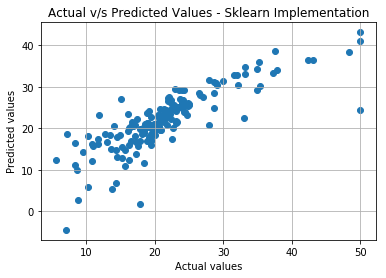

In [26]:
ssgd_w, ssgd_b, ssgd_mse = skl_sgd(xtr, ytr, xte, yte, 'constant', 1000, 0.01)

In [27]:
ssgd_w

array([-0.91089995,  0.83234791,  0.6299102 ,  0.60516207, -2.22948098,
        3.28290641, -0.33861146, -3.55351102,  2.58606492, -1.94366572,
       -1.71764473,  0.63510624, -4.123873  ])

In [28]:
ssgd_b

array([22.93948666])

In [29]:
ssgd_mse

21.261120057137557

In [33]:
#https://ptable.readthedocs.io/en/latest/tutorial.html
#Creating Table for comparing weights of Manual & Sklearn SGD implementation
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ["Custom SGD Weights", "Sklearn SGD Weights"]
for _ in range(13):
    t.add_row([csgd_w[0][_],ssgd_w[_]])
print(t)

+----------------------+----------------------+
|  Custom SGD Weights  | Sklearn SGD Weights  |
+----------------------+----------------------+
| -1.2296540674156926  | -0.9108999540173801  |
|  0.9540305085643804  |  0.8323479138033147  |
| -0.14395841841583884 |  0.6299101968731667  |
|  0.1389120329961845  |  0.6051620673330784  |
| -2.9294201473628125  | -2.2294809849840984  |
|  3.2607149393037433  |  3.2829064111853454  |
| -1.4131721008535971  | -0.33861146152145244 |
|  -4.477870332822942  | -3.5535110208483878  |
|  2.4360868839593204  |  2.5860649220859195  |
| -1.8602171218655388  |  -1.943665724945984  |
|  -2.97417702914243   | -1.7176447333649525  |
| 0.42859938476137077  |  0.6351062448577296  |
|  -2.419573616867576  |  -4.123872998414896  |
+----------------------+----------------------+


In [31]:
#Comparing MSE for Custom vs Scikit Learn SGD Implementation
v = PrettyTable()
v.field_names = ["Custom SGD MSE", "Sklearn SGD MSE"]
v.add_row([Csgd_mse, ssgd_mse])
print(v)

+--------------------+--------------------+
|   Custom SGD MSE   |  Sklearn SGD MSE   |
+--------------------+--------------------+
| 22.468275512648155 | 21.261120057137557 |
+--------------------+--------------------+


### Observations :- 

1. Scatter Plots for actual vs predicted values of Custom SGD Implemetation &      Sklearn SGD Implementation look similar to each other.


2. Weights for Custom SGD Implementation & Scikit Learn SGD Implementation are    very close to each other.


3. Mean Squared error for Custom SGD is 22.46 & for SCikit Learn SGD is 21.26.


4. We can conclude that Custom SGD implementation & Scikit Learn SGD              implemetation have MSE close to each other with Scikit Learn being              slightly better than the Custom SGD Implementation.